# BayWheel Trip Dataset
## by william

## Preliminary Wrangling

> This Document is about baywheel trip data for a March in 2020. The dataset is downloaded from BayWheels website. 

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> This dataset is about baywheels bike rented records. Some exploration that will be conducted are customer rental time behavior across variables like rental access and customer type

In [198]:
#Load the dataset
df = pd.read_csv('202003-baywheels-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         35187  2020-03-31 20:42:10.0790  2020-04-01 06:28:37.8440   
1         14568  2020-03-31 22:45:25.5010  2020-04-01 02:48:13.7730   
2         35990  2020-03-31 15:08:22.3310  2020-04-01 01:08:12.9900   
3          1068  2020-03-31 23:55:00.4260  2020-04-01 00:12:49.0200   
4          3300  2020-03-31 23:00:55.6410  2020-03-31 23:55:56.6110   

   start_station_id                             start_station_name  \
0             462.0                     Cruise Terminal at Pier 27   
1              42.0  San Francisco City Hall (Polk St at Grove St)   
2             391.0                          1st St at Younger Ave   
3             456.0                    Arguello Blvd at Geary Blvd   
4               6.0                  The Embarcadero at Sansome St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.804648              -122.402087            24.0   
1               37.778650              -122.418230           370.0   
2               37.355030              -121.904436           397.0   
3               37.781468              -122.458806           107.0   
4               37.804770              -122.403234            24.0   

        end_station_name  end_station_latitude  end_station_longitude  \
0  Spear St at Folsom St             37.789677            -122.390428   
1    Jones St at Post St             37.787327            -122.413278   
2      Gish Rd at 1st St             37.361867            -121.909315   
3  17th St at Dolores St             37.763015            -122.426497   
4  Spear St at Folsom St             37.789677            -122.390428   

   bike_id user_type rental_access_method  
0    10982  Customer                  NaN  
1    12617  Customer                  NaN  
2    12812  Customer                  NaN  
3    12955  Customer                  NaN  
4    13050  Customer                  NaN

In [71]:
df.rental_access_method.unique()

array([nan, 'app', 'clipper'], dtype=object)

In [62]:
df.shape

(176799, 14)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             176799 non-null  int64  
 1   start_time               176799 non-null  object 
 2   end_time                 176799 non-null  object 
 3   start_station_id         110696 non-null  float64
 4   start_station_name       111349 non-null  object 
 5   start_station_latitude   176799 non-null  float64
 6   start_station_longitude  176799 non-null  float64
 7   end_station_id           111097 non-null  float64
 8   end_station_name         111794 non-null  object 
 9   end_station_latitude     176799 non-null  float64
 10  end_station_longitude    176799 non-null  float64
 11  bike_id                  176799 non-null  int64  
 12  user_type                176799 non-null  object 
 13  rental_access_method     114269 non-null  object 
dtypes: f

In [64]:
df.duplicated().sum()

0

### What is the structure of your dataset?

> The data has 176799 rows and 14 columns. 

> Duplicate data is not found among the data

> some columns has missing data, like start station, end station id and name, and rental access method.

> Missing data will not be a problem especially station id and name because they are represented by station coordinate. 


### What is/are the main feature(s) of interest in your dataset?

> I would like to seee average duration customer spent on renting the bike. Column duration_sec is the main feature in the dataset. This column is related to Baywheels customer behavior. This informatoin will give company insight to design the bike, whether they care about aesthetics or functionality, and other policies.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features like user_type, rental_access_method, and renting location will give me insights related to baywheels business on customer segmentation, where to put more renting bike, and baywheels subscriber behavior.

## Univariate Exploration



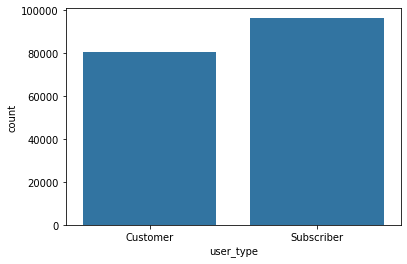

In [69]:
#Building user type plot using bar chart
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type', color=base_color)

Baywheels users have more subscriber than regular customer. This means that customer put their trust in Baywheels subscription product.

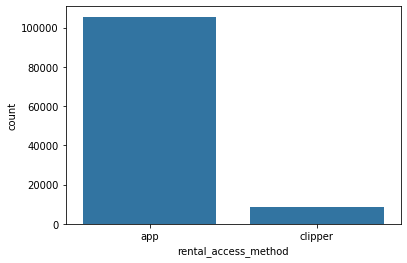

In [70]:
sb.countplot(data=df, x='rental_access_method', color=base_color)

A lot of Baywheels customers are using software app to rent the bike. Maybe BayWheels should cut the expense on clipper development or paying more attention to clipper method.

(0, 20000)

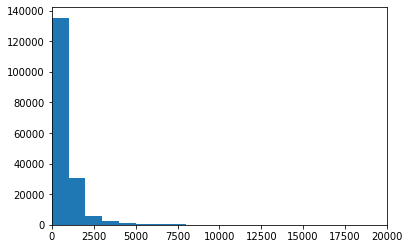

In [75]:
bins = np.arange(0, 20000, 1000) 
plt.hist(df.duration_sec, bins=bins);
plt.xlim(0, 20000)

The data is right skewed. Better transform it using log transformation on x axis

In [95]:
#Adding duration in minutes
df['duration_min']=df['duration_sec']/60

Text(0.5, 1.0, 'Rental time distribution')

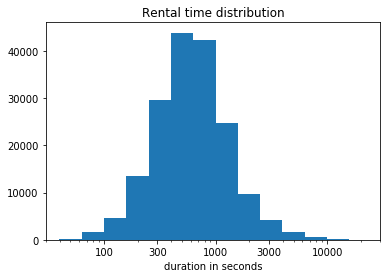

In [197]:
#Building log transformed histogram on duration rented (seconds)
bins = 10**np.arange(0, np.log10(df.duration_sec.max()+0.2), 0.2) 
plt.hist(df.duration_sec, bins=bins);
plt.xscale('log')
ticks = [100,300,1000,3000,10000, 300000]
plt.xticks(ticks, ticks)
plt.xlim(30, 30000)
plt.xlabel('duration in seconds')
plt.title('Rental time distribution')

C:\Users\william\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


Text(0.5, 1.0, 'Rental time distribution')

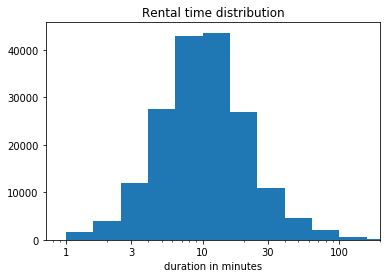

In [196]:
#Building log transformed histogram on duration rented (minutes)
bins = 10**np.arange(0, np.log10(df.duration_min.max()+0.2), 0.2) 
plt.hist(df.duration_min, bins=bins);
plt.xscale('log')
ticks = [1,3,10,30,100]
plt.xticks(ticks, ticks)
plt.xlim(0, 200)
plt.xlabel('duration in minutes')
plt.title('Rental time distribution')

The renting duration, after log transformation, is unimodal and normal distributed with its peak around 861 seconds or 12.3 minutes.

In [173]:
#dropping data with duration > 3000 sec because they are considered outlier
ind=df[df.duration_sec > 3000].index
df2=df.copy()
df2.drop(ind, axis=0, inplace=True)

In [174]:
10**np.log10(df.duration_sec.describe())

count    176799.000000
mean        861.590156
std        1528.143090
min          60.000000
25%         374.000000
50%         602.000000
75%         963.000000
max       84450.000000
Name: duration_sec, dtype: float64

In [137]:
df.start_station_latitude.describe()

count    176799.000000
mean         37.732506
std           0.170476
min           0.000000
25%          37.763708
50%          37.776598
75%          37.789677
max          37.880222
Name: start_station_latitude, dtype: float64

Text(0.5, 1.0, 'Start station altitude Distribution ')

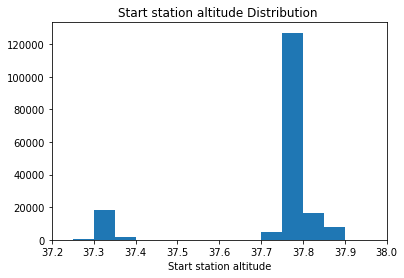

In [195]:
#plotting start station latitude distribution
bins = np.arange(0, 38, 0.05)
plt.hist(df.start_station_latitude, bins=bins);
plt.xlim((37.2,38))
plt.xlabel('Start station altitude')
plt.title('Start station altitude Distribution ')

Text(0.5, 1.0, 'Start station longitute Distribution ')

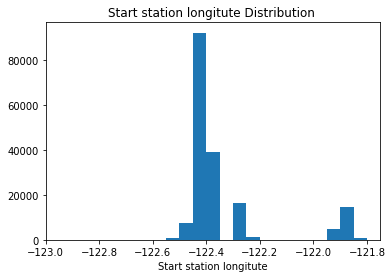

In [194]:
# plotting start station longitute distribuion
bins = np.arange(-140, -110, 0.05)
plt.hist(df.start_station_longitude, bins=bins);
plt.xlim((-123,-121.75))
plt.xlabel('Start station longitute')
plt.title('Start station longitute Distribution ')

Based on two above plots, the most frequent longitute is -122.5 and most frequent altitute is 37.75.
Bay Wheels should focused on these coordinate to plan their scale up bike availability.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I performed transformation on duration seconds to better understand the right skewed data. Sure, there is something unusual, in duration rented, data is so right skewed and contain outlier.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I adjusted duration limit from 0 to 10.000 seconds. Data outside that range is considered outlier. Outlier is dropped(duration_sec > 3000 second.

## Bivariate Exploration



In [175]:
df2.head()

duration_sec                start_time                  end_time  \
3        1068.0  2020-03-31 23:55:00.4260  2020-04-01 00:12:49.0200   
5        1232.0  2020-03-31 23:29:19.3950  2020-03-31 23:49:52.2520   
6         368.0  2020-03-31 23:35:03.8340  2020-03-31 23:41:12.2210   
7         659.0  2020-03-31 23:22:37.9450  2020-03-31 23:33:37.2200   
8         989.0  2020-03-31 23:03:41.1040  2020-03-31 23:20:10.8160   

   start_station_id             start_station_name  start_station_latitude  \
3             456.0    Arguello Blvd at Geary Blvd               37.781468   
5             152.0       47th St at San Pablo Ave               37.835632   
6             458.0  Frederick St at Arguello Blvd               37.765783   
7             253.0        Haste St at College Ave               37.866418   
8             148.0           Horton St at 40th St               37.829705   

   start_station_longitude  end_station_id             end_station_name  \
3              -122.458806           107.0        17th St at Dolores St   
5              -122.281051           195.0          Bay Pl at Vernon St   
6              -122.457637            70.0       Central Ave at Fell St   
7              -122.253799           241.0           Ashby BART Station   
8              -122.287610           197.0  El Embarcadero at Grand Ave   

   end_station_latitude  end_station_longitude  bike_id user_type  \
3             37.763015            -122.426497    12955  Customer   
5             37.812314            -122.260779     9746  Customer   
6             37.773311            -122.444293    11057  Customer   
7             37.852477            -122.270213    10488  Customer   
8             37.808848            -122.249680    11552  Customer   

  rental_access_method  duration_min  
3                  NaN     17.800000  
5                  NaN     20.533333  
6                  NaN      6.133333  
7                  NaN     10.983333  
8                  NaN     16.483333

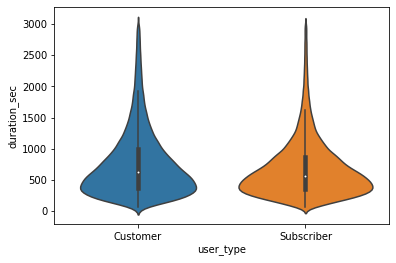

In [176]:
#Plotting violin plot on user type and duration
sb.violinplot(data=df2, x='user_type', y='duration_sec')

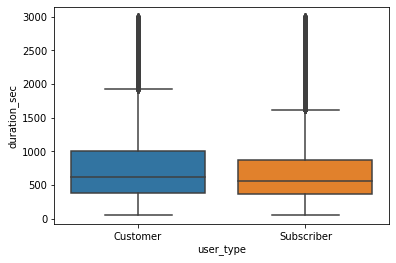

In [181]:
#Plotting box plot on user type and duration
sb.boxplot(data=df2, x='user_type', y='duration_sec')

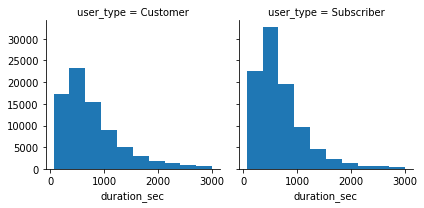

In [180]:
# Plotting duration distribution with user type
g = sb.FacetGrid(data = df2, col = 'user_type')
g.map(plt.hist, "duration_sec")

From the plots above, there is little difference in duration rented between Baywheels subscriber and customer.
They both share the same distribution and have the same mode, around 500 seconds or 8.3 minutes. 
The same observation here is the two customer rented time is right skewed. Eight minutes usually used to play with the bike with leisure, walking aroung the park or other short time activities.

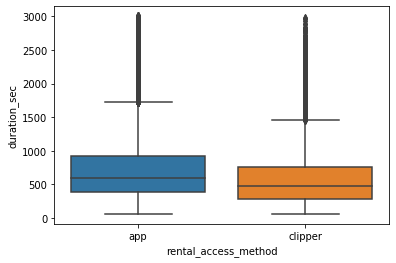

In [182]:
sb.boxplot(data=df2, x='rental_access_method' ,y='duration_sec')

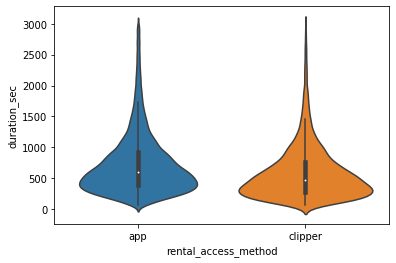

In [183]:
sb.violinplot(data=df2, x='rental_access_method' ,y='duration_sec')

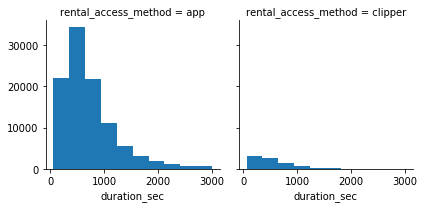

In [185]:
# Plotting duration distribution with user type
g = sb.FacetGrid(data = df2, col = 'rental_access_method')
g.map(plt.hist, "duration_sec")

The same observation is found in rental access method. The rented duration is not different significantly. The average rented duration in clipper is lower than customer using application.

The data in clipper is not as many as application, it is much easier to use mobile application than to use the convention clipper card.

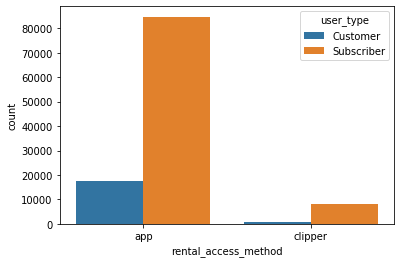

In [189]:
sb.countplot(data=df2, x='rental_access_method', hue='user_type')

Baywheels customer prefer using mobile application rather than using card clipper and the numebr of subscriber is suprisingly high in mobile app and clipper. Only a few amount that use Baywheel service is a casual customer. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Interesting oberservations in this section are the duration rented is not differ significantly between the rental access and user type variable. This gives me a hint that rental time is not affected by rental accesss method nor user type. Baywheels consumer have the same preference without any significant difference between the 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Something interesting here: Baywheels have more subscriber users. The subscriber is so much higher than casual customer. 

## Multivariate Exploration


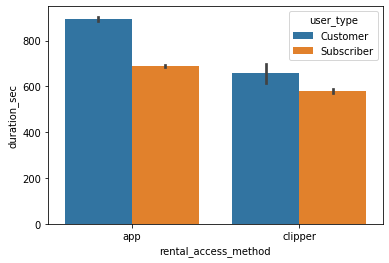

In [193]:
#COnstruction clustered bar plot between rental access, duration, and user type
sb.barplot(data=df2, x='rental_access_method', y='duration_sec', hue='user_type')

Even though, Baywheels customers consist of subscriber, casual customer spent more time renting the bike than subscriber in both rental access (app, clipper). 

The average time spent from casual customer that used app is over 800. This is higher than the average of subscriber customer that used the app. There difference is about 200 seconds or 3.33 minutes. But, on average, customer who used clipper do not differ significantly.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Rental duration do not differ significantly across the variables that have been observed. I think that Baywheels customer have the same motive regarding the business value propostion. Even though, the casual customer that used app have average time over 800 second. This is not significantly differ from the other type. That three minutes difference could mean something. That could be customer queuing time and needed to be assesed.
This information will benefit company regarding service performance.

### Were there any interesting or surprising interactions between features?

There is no interaction effect found in the variables. This justified that our customer rental time behavior is not significantly affected by their access method and subscription.

The average time spent from casual customer that used app is over 800. This is higher than the average of subscriber customer that used the app. There difference is about 200 seconds or 3.33 minutes. But, on average, customer who used clipper do not differ significantly.

## Conclusion

- On average, the time Baywheel customer spent on renting the bike is not significantly different across user type and rental access method.

- Rental access using mobile app is preferred than using the traditional clipper card.


- A lot of Baywheel customers are subcriber. Thats mean they could improve their marketing technique to acquire untouch market.

- Casual customer spent more time renting the bike than subscriber. Maybe this is because they are first time user that got excited. Subscriber users have lower rental time than casual.

- Average renting bike for every customers is around 12 minutes. Baywheels could manage their delivery performance by assesing the waiting time for each customer. 